<a href="https://colab.research.google.com/github/holydiver-zerog/repository-public/blob/main/DLtest5_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# list5.15.py
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 29.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=a804ac8f53022694f12aef881db42fc494da2580930b85f50885b0d6f2626054
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


In [2]:
# list5.16.py
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"学習データ（問題画像）　：{x_train.shape}")
print(f"テストデータ（問題画像）：{x_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
学習データ（問題画像）　：(50000, 32, 32, 3)
テストデータ（問題画像）：(10000, 32, 32, 3)


In [3]:
# list5.17.py
class_names = ["飛行機", "自動車", "鳥", "ネコ", "シカ",
               "イヌ", "カエル", "ウマ", "船", "トラック"]

In [4]:
# list5.18.py
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary(line_length=120)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                                        ┃ Output Shape                           ┃               Para
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━
│ conv2d (Conv2D)                                     │ (None, 28, 28, 32)                     │                 2,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ max_pooling2d (MaxPooling2D)                        │ (None, 14, 14, 32)                     │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dropout (Dropout)                                   │ (None, 14, 14, 32)                     │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ conv2d_1 (Conv2D)                                   │ (None, 10, 10, 64)                     │                51,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ max_pooling2d_1 (MaxPooling2D)                      │ (None, 5, 5, 64)                       │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dropout_1 (Dropout)                                 │ (None, 5, 5, 64)                       │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ flatten (Flatten)                                   │ (None, 1600)                           │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dense (Dense)                                       │ (None, 64)                             │               102,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dropout_2 (Dropout)                                 │ (None, 64)                             │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dense_1 (Dense)                                     │ (None, 32)                             │                 2,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dense_2 (Dense)                                     │ (None, 10)                             │                   
└─────────────────────────────────────────────────────┴────────────────────────────────────────┴───────────────────

 Total params: 158,570 (619.41 KB)

 Trainable params: 158,570 (619.41 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# list5.19.py
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=20, #20
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 61ms/step - accuracy: 0.3034 - loss: 1.8602 - val_accuracy: 0.4771 - val_loss: 1.4902
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 55ms/step - accuracy: 0.5086 - loss: 1.3670 - val_accuracy: 0.5872 - val_loss: 1.1524
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - accuracy: 0.5651 - loss: 1.2244 - val_accuracy: 0.6223 - val_loss: 1.0784
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.5913 - loss: 1.1463 - val_accuracy: 0.6265 - val_loss: 1.0651
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.6188 - loss: 1.0807 - val_accuracy: 0.6538 - val_loss: 1.0089
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.6427 - loss: 1.0215 - val_accuracy: 0.6672 - val_loss: 0.9585
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 55ms/step - accuracy: 0.6532 - loss: 0.9852 - val_accuracy: 0.6760 - val_loss: 0.9470
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 55ms/step - accuracy: 0.664

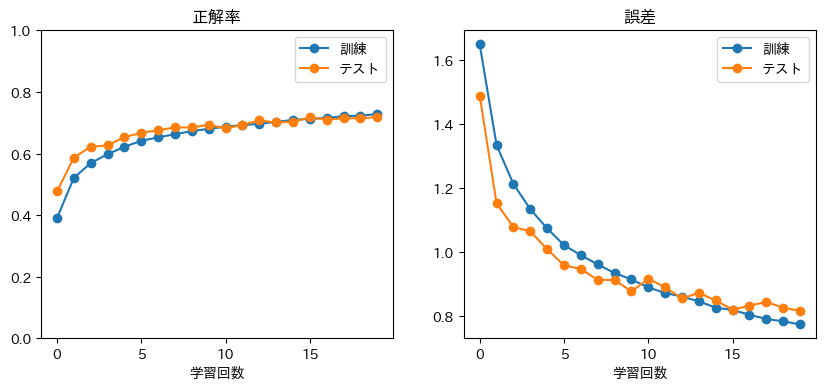

In [6]:
# list5.20.py
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


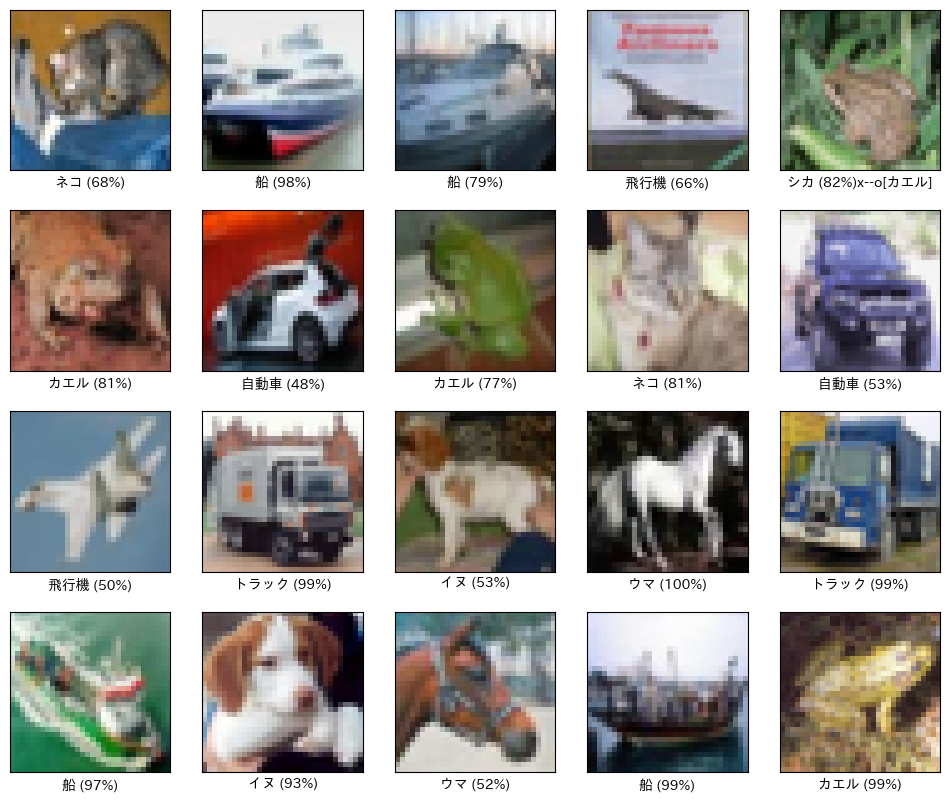

In [7]:
# list5.21.py
pre = model.predict(x_test)

plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])

    index = np.argmax(pre[i])
    pct = pre[i][index]
    ans = ""
    if index != y_test[i]:
        ans = "x--o["+class_names[y_test[i][0]]+"]"
    lbl = f"{class_names[index]} ({pct:.0%}){ans}"
    plt.xlabel(lbl)
plt.show()

In [8]:
# list5.22.py
hidden_layers = []
for i, val in enumerate(model.layers):
    print(f"{i} : {val.name}")
    hidden_layers.append(val.output)

hidden_model = keras.models.Model(inputs=model.inputs, outputs=hidden_layers)
outputs = hidden_model.predict(x_test)

0 : conv2d
1 : max_pooling2d
2 : dropout
3 : conv2d_1
4 : max_pooling2d_1
5 : dropout_1
6 : flatten
7 : dense
8 : dropout_2
9 : dense_1
10 : dense_2
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step


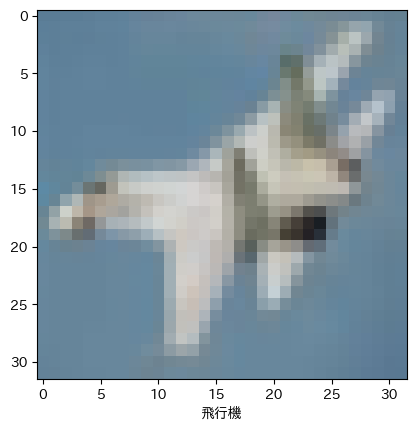

In [9]:
# list5.23.py
i = 10
plt.imshow(x_test[i])
plt.xlabel(class_names[y_test[i][0]])
plt.show()

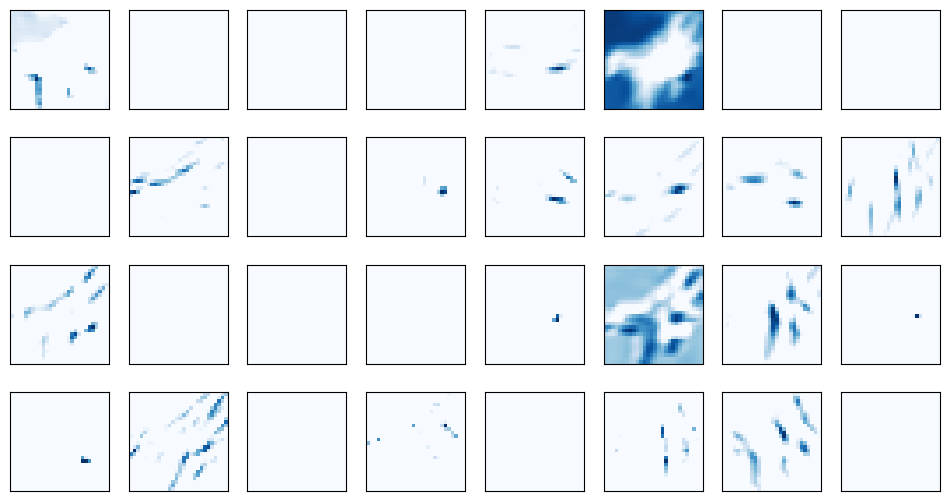

In [10]:
# list5.24.py
def disp_hidden_data(data, w):
    plt.figure(figsize=(12,8))
    num = data.shape[2]
    for i in range(num):
        plt.subplot(int(num/w) + 1, w, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(data[:,:,i], cmap="Blues")
# 0 : conv2d
disp_hidden_data(outputs[0][i], 8)

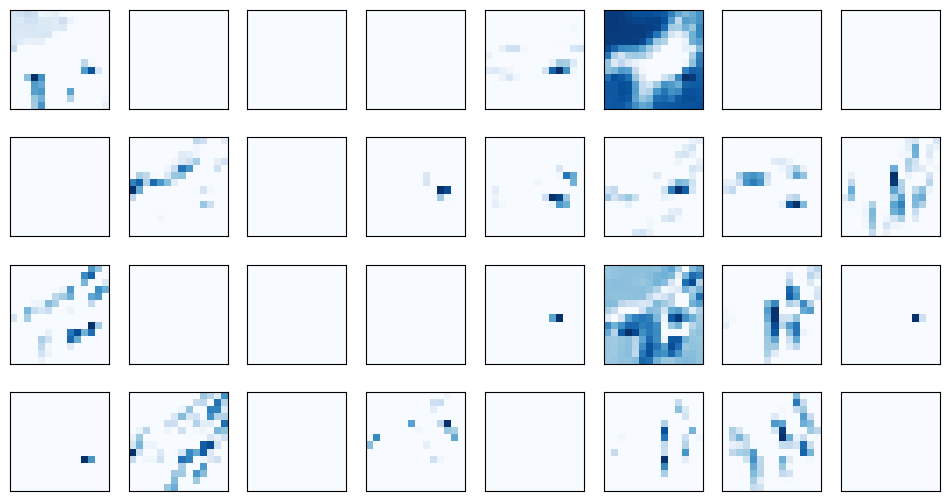

In [11]:
# list5.25.py
# 1 : max_pooling2d
disp_hidden_data(outputs[1][i], 8)